In [1]:
%pip install "pillow<7"
import os
import re
import sys
import glob
import numpy as np
import matplotlib.pyplot as plt
import unittest
import torch
import torchvision
import torchvision.transforms as tvtf
import torch.nn as nn
import torch.optim as optim


%matplotlib inline
%load_ext autoreload
%autoreload 2

seed = 42
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

plt.rcParams.update({'font.size': 12})
test = unittest.TestCase()

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
from utils import *
from  utils import models
import utils.experiments as experiments
from utils.experiments import load_experiment
from utils.plot import plot_fit
import utils.training as training
torch.manual_seed(seed)

In [3]:
def plot_exp_results(filename_pattern, results_dir='results'):
    fig = None
    result_files = glob.glob(os.path.join(results_dir, filename_pattern))
    result_files.sort()
    if len(result_files) == 0:
        print(f'No results found for pattern {filename_pattern}.', file=sys.stderr)
        return
    for filepath in result_files:
        m = re.match('exp\d_(\d_)?(.*)\.json', os.path.basename(filepath))
        cfg, fit_res = load_experiment(filepath)
        fig, axes = plot_fit(fit_res, fig, legend=m[2],log_loss=True)
    if 'filters_per_layer' in cfg:
        del cfg['filters_per_layer']
        del cfg['layers_per_block']
    print('common config: ', cfg)

## Build Your Own Achitecture

### 1. Implement YourCodeNet model
Implement YourCodeNet model in utiles/models and define the model architecture (use your previouse assignment's insights).
Define `filters_per_layer`, `layers_per_block` and `hidden_dims` which you believe are the best for this task. You can run some experiments in order to set these hyperparameters.

To make the experiment runner use your custom network model, remember to set ycn=True when you call experiments.run_experiment(...).


In [43]:
filter_count=32
layers_per_block = 3
pool_every = layers_per_block
hidden_layer_size = 100
hidden_layer_count = 2
batch_size = 64
epoch_num=100
lr=1e-3
reg=0
filters_per_layer=[filter_count,filter_count*2,filter_count*4,filter_count*8,filter_count*16]
optimizer="Adam"
l1 = False
early_stop=100
#hyper parameters

hidden_dims=[hidden_layer_size]*hidden_layer_count
for layers_per_block in [2,3,4]:
    pool_every = layers_per_block
    experiments.run_experiment(f"exp7_1_layers{layers_per_block}",
                        bs_train=batch_size,
                        batches=10000,
                        epochs=epoch_num, 
                        early_stopping=early_stop,
                        reg=reg,
                        lr=lr,
                        filters_per_layer=filters_per_layer,
                        layers_per_block=layers_per_block,
                        pool_every=pool_every,
                        hidden_dims=hidden_dims,
                        tol=1e-3,
                        ycn=True,
                        optimizer=optimizer,
                        augmentation=False,
                        momentum=0,
                        l1=l1,
                        #checkpoints="test_deepening_layers",
                        short_train=True)
# ========================

test_batch (Avg. Loss 2.304, Accuracy 10.1): 100%|██████████| 469/469 [00:04<00:00, 109.20it/s]
epoches without improvement: 0
--- EPOCH 43/100 ---
test_batch (Avg. Loss 2.304, Accuracy 10.1): 100%|██████████| 469/469 [00:04<00:00, 116.80it/s]
epoches without improvement: 0
--- EPOCH 44/100 ---
test_batch (Avg. Loss 2.304, Accuracy 10.1): 100%|██████████| 469/469 [00:03<00:00, 118.17it/s]
epoches without improvement: 0
--- EPOCH 45/100 ---
test_batch (Avg. Loss 2.304, Accuracy 10.1): 100%|██████████| 469/469 [00:03<00:00, 120.82it/s]
epoches without improvement: 0
--- EPOCH 46/100 ---
test_batch (Avg. Loss 2.304, Accuracy 10.1): 100%|██████████| 469/469 [00:03<00:00, 120.32it/s]
epoches without improvement: 0
--- EPOCH 47/100 ---
test_batch (Avg. Loss 2.303, Accuracy 10.1): 100%|██████████| 469/469 [00:03<00:00, 119.26it/s]
epoches without improvement: 0
--- EPOCH 48/100 ---
test_batch (Avg. Loss 2.304, Accuracy 10.1): 100%|██████████| 469/469 [00:03<00:00, 118.52it/s]
epoches without 

common config:  {'run_name': 'exp7_1_layers4', 'out_dir': './results', 'seed': 1909761913, 'bs_train': 64, 'bs_test': 16, 'batches': 10000, 'epochs': 100, 'early_stopping': 100, 'checkpoints': None, 'lr': 0.001, 'reg': 0, 'optimizer': 'Adam', 'momentum': 0, 'pool_every': 4, 'hidden_dims': [100, 100], 'ycn': True, 'short_train': True, 'kw': {'tol': 0.001, 'augmentation': False, 'l1': False}}


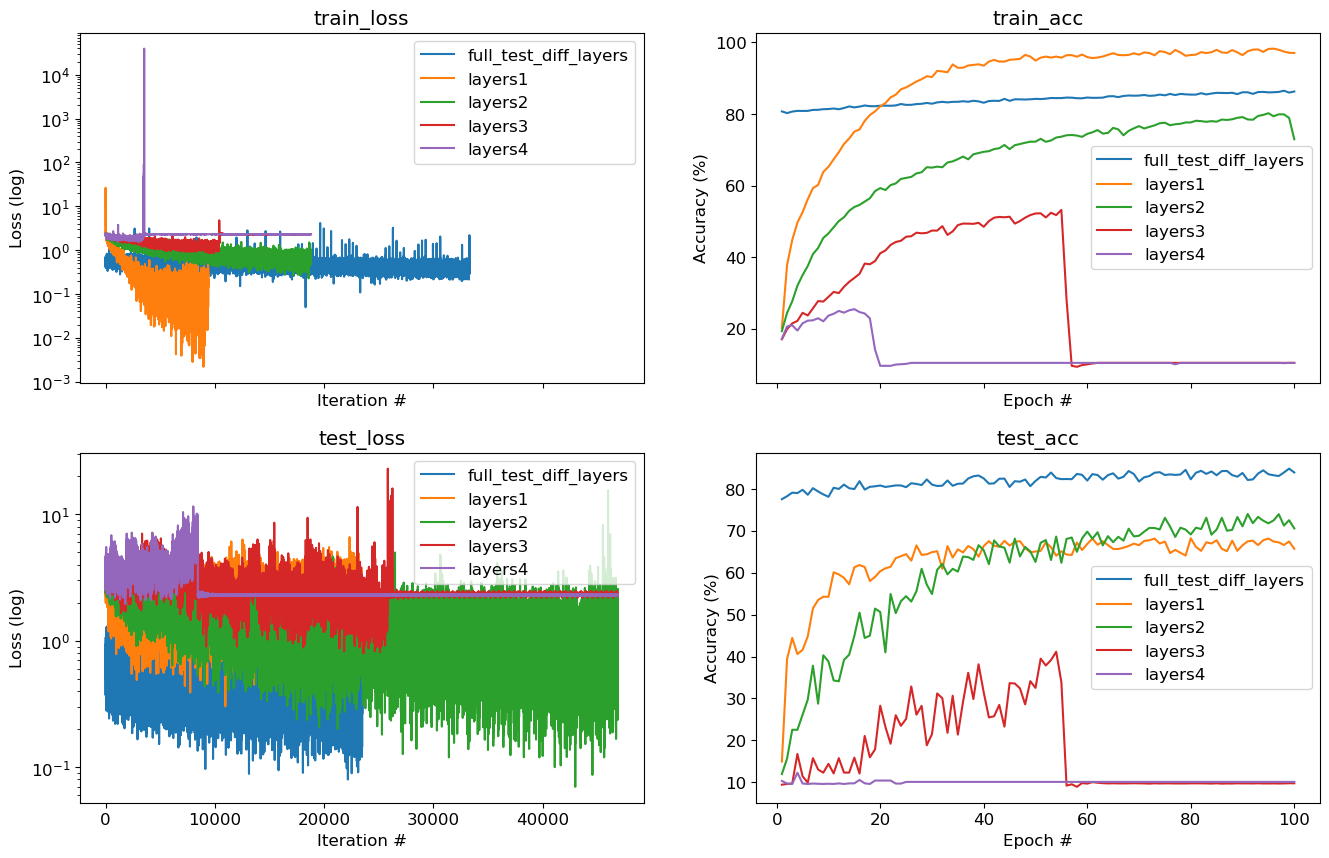

In [4]:
plot_exp_results('exp7_1_*.json') # plot your experiments results

In [5]:
filter_count=32
layers_per_block = 2
pool_every = layers_per_block
hidden_layer_size = 100
hidden_layer_count = 2
batch_size = 128
epoch_num=100
lr=1e-3
reg=0
filters_per_layer=[filter_count,filter_count*2,filter_count*4,filter_count*8,filter_count*16]
optimizer="Adam"
l1 = False
early_stop=100
#hyper parameters

for hidden_layer_count in [0,2,4,6]:
  hidden_dims=[hidden_layer_size]*hidden_layer_count
  experiments.run_experiment(f"exp7_2_hidden{hidden_layer_count}",
                      bs_train=batch_size,
                      batches=10000,
                      epochs=epoch_num, 
                      early_stopping=early_stop,
                      reg=reg,
                      lr=lr,
                      filters_per_layer=filters_per_layer,
                      layers_per_block=layers_per_block,
                      pool_every=pool_every,
                      hidden_dims=hidden_dims,
                      tol=1e-3,
                      ycn=True,
                      optimizer=optimizer,
                      augmentation=False,
                      momentum=0,
                      l1=l1,
                      #checkpoints="test_deepening_layers",
                      short_train=True)
# ========================

Files already downloaded and verified
Files already downloaded and verified
YourCodeNet(
  (feature_extractor): Sequential(
    (0): SkipConnectionLayer(
      (connection): Conv2d(3, 32, kernel_size=(1, 1), stride=(1, 1), padding=same)
      (layer): Sequential(
        (0): LeakyReLU(negative_slope=0.01)
        (1): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
        (3): LeakyReLU(negative_slope=0.01)
        (4): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
      )
    )
    (1): Dropout(p=0.5, inplace=False)
    (2): SkipConnectionLayer(
      (connection): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), padding=same)
      (layer): Sequential(
        (0): LeakyReLU(negative_slope=0.01)
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=s

common config:  {'run_name': 'exp7_2_hidden6', 'out_dir': './results', 'seed': 1616751811, 'bs_train': 128, 'bs_test': 32, 'batches': 10000, 'epochs': 100, 'early_stopping': 100, 'checkpoints': None, 'lr': 0.001, 'reg': 0, 'optimizer': 'Adam', 'momentum': 0, 'pool_every': 2, 'hidden_dims': [100, 100, 100, 100, 100, 100], 'ycn': True, 'short_train': True, 'kw': {'tol': 0.001, 'augmentation': False, 'l1': False}}


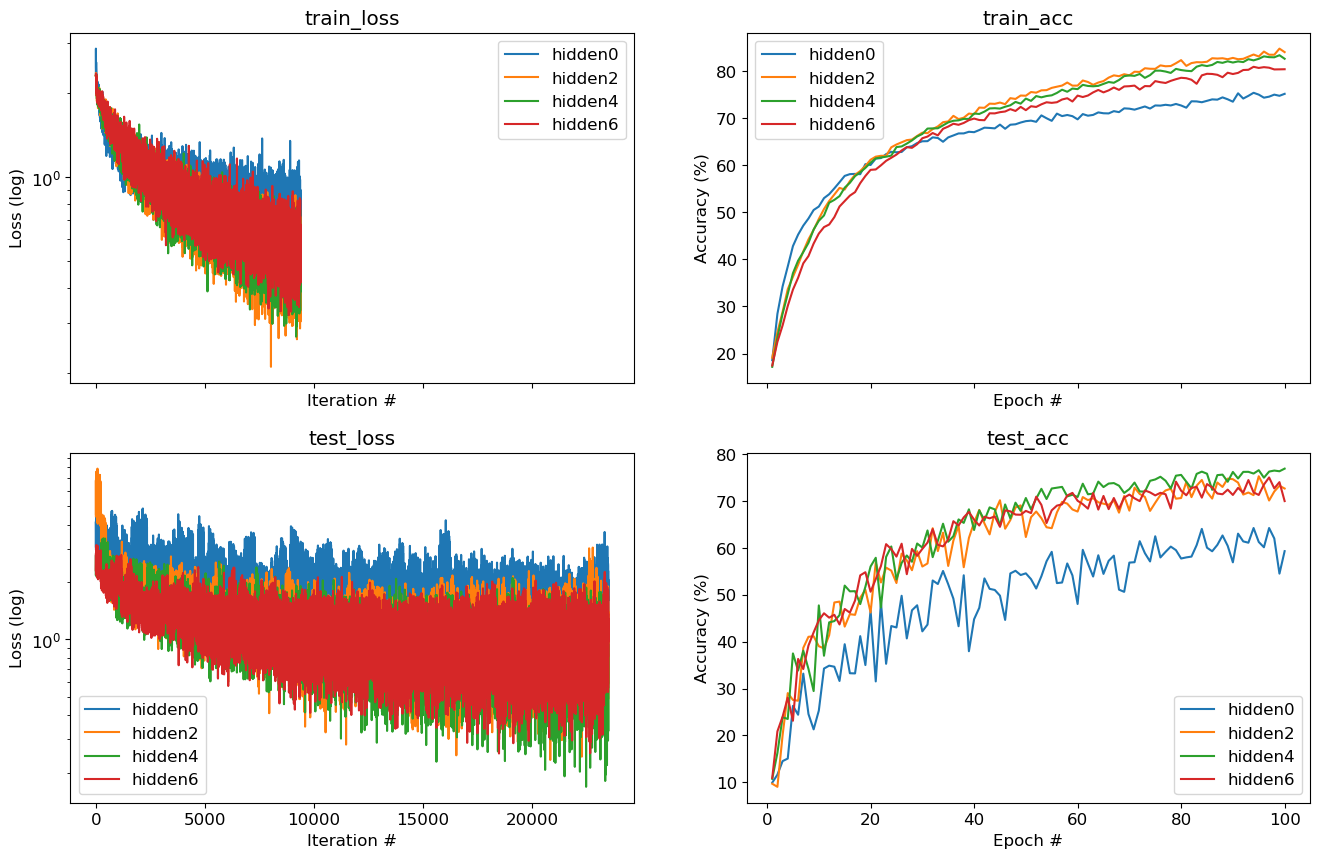

In [5]:
plot_exp_results('exp7_2_*.json')

In [7]:
#hyper parameters
filter_count=32
layers_per_block = 2
pool_every = layers_per_block
hidden_layer_size = 100
hidden_layer_count = 4
batch_size = 64
epoch_num=100
lr=1e-3
reg=0
filters_per_layer=[filter_count,filter_count*2,filter_count*4,filter_count*8,filter_count*16]
optimizer="Adam"
l1 = False
early_stop=100
#hyper parameters

for l in [100,120,70]:
  hidden_dims=[l]*hidden_layer_count
  experiments.run_experiment(f'exp7_3_h{l}_l{hidden_layer_count}',
                            bs_train=batch_size,
                            batches=10000,
                            epochs=epoch_num, 
                            early_stopping=100,
                            reg=reg,
                            lr=lr,
                            filters_per_layer=filters_per_layer,
                            layers_per_block=layers_per_block,
                            pool_every=pool_every,
                            hidden_dims=hidden_dims,
                            tol=1e-3,
                            ycn=True,
                            optimizer=optimizer,
                            momentum=0,
                            augmentation=False,
                            short_train=True)
# ========================

Files already downloaded and verified
Files already downloaded and verified
YourCodeNet(
  (feature_extractor): Sequential(
    (0): SkipConnectionLayer(
      (connection): Conv2d(3, 32, kernel_size=(1, 1), stride=(1, 1), padding=same)
      (layer): Sequential(
        (0): LeakyReLU(negative_slope=0.01)
        (1): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
        (3): LeakyReLU(negative_slope=0.01)
        (4): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
      )
    )
    (1): Dropout(p=0.5, inplace=False)
    (2): SkipConnectionLayer(
      (connection): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), padding=same)
      (layer): Sequential(
        (0): LeakyReLU(negative_slope=0.01)
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=s

common config:  {'run_name': 'exp7_3_h70_l4', 'out_dir': './results', 'seed': 1232190114, 'bs_train': 64, 'bs_test': 16, 'batches': 10000, 'epochs': 100, 'early_stopping': 100, 'checkpoints': None, 'lr': 0.001, 'reg': 0, 'optimizer': 'Adam', 'momentum': 0, 'pool_every': 2, 'hidden_dims': [70, 70, 70, 70], 'ycn': True, 'short_train': True, 'kw': {'tol': 0.001, 'augmentation': False}}


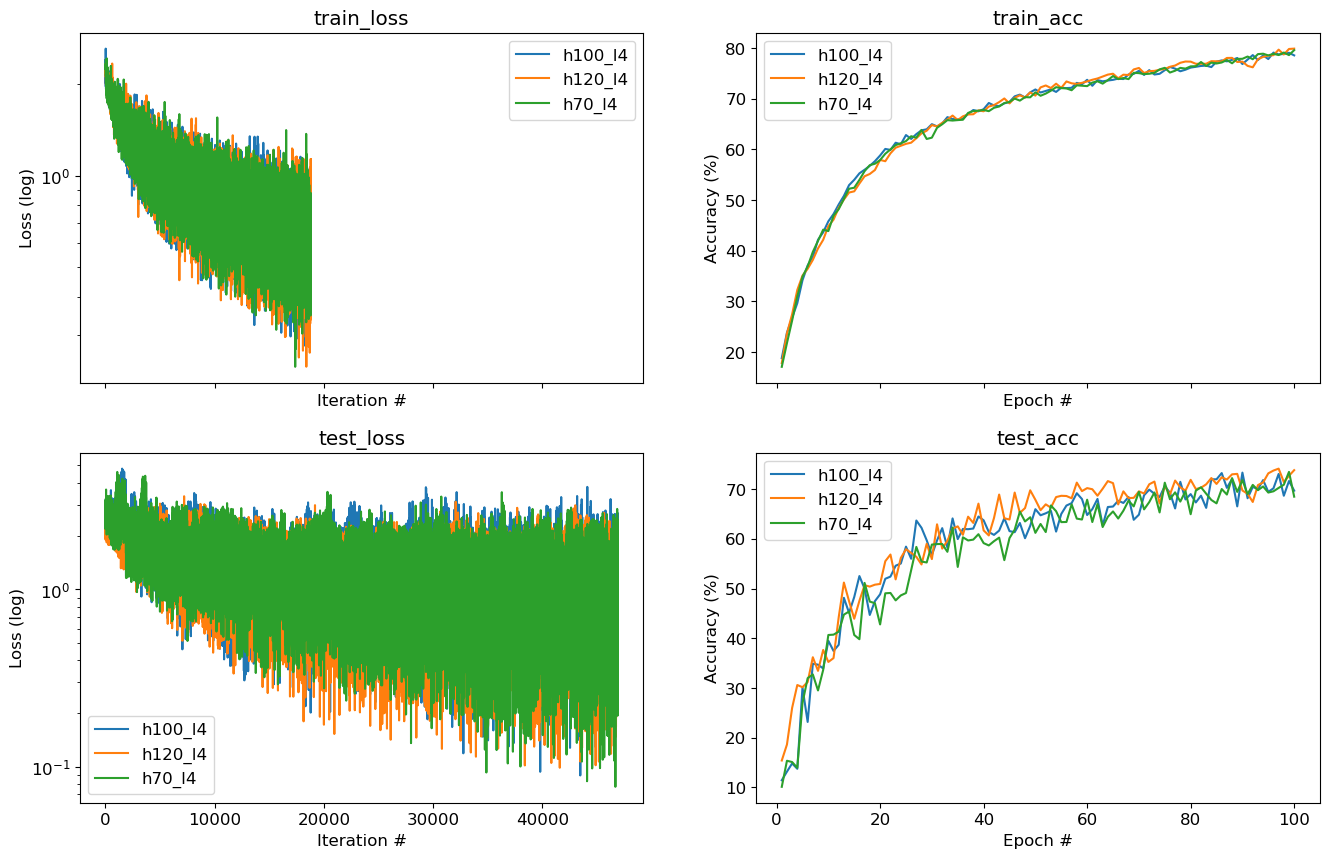

In [6]:
plot_exp_results('exp7_3_*l*.json') # plot your experiments results

### 2. Learning rate and optimization method
Tune the optimization algorithm (try SGD with momentum and Adam) and the learning rate (try values between 0.0005-1, try no more than five values).

In [11]:
# set ycn=True when you call experiments.run_experiment(...). 
# Use meaningful names!
# ====== YOUR CODE: ======

#hyper parameters
filter_count=32
layers_per_block = 2
pool_every = layers_per_block
hidden_layer_size = 120
hidden_layer_count = 4
batch_size = 64
epoch_num=100
lr=1e-3
reg=0
filters_per_layer=[filter_count,filter_count*2,filter_count*4,filter_count*8,filter_count*16]
optimizer="Adam"
l1 = False
early_stop=100
#hyper parameters

hidden_dims=[hidden_layer_size]*hidden_layer_count

for optimizer in ["AdaGrad","SGDmomentum","SGD","Adam"]:
    for lr in [0.1,1e-2,5e-3,1e-3,5e-4]:
        experiments.run_experiment(f'exp8_1_lr{lr}_optim{optimizer}',
                            bs_train=batch_size,
                            batches=10000,
                            epochs=epoch_num, 
                            early_stopping=early_stop,
                            reg=reg,
                            lr=lr,
                            filters_per_layer=filters_per_layer,
                            layers_per_block=layers_per_block,
                            pool_every=pool_every,
                            hidden_dims=hidden_dims,
                            tol=1e-3,
                            ycn=True,
                            optimizer=optimizer,
                            momentum=1 if optimizer=="SGDmomentum" else 0,
                            augmentation=False,
                            short_train=True)
# ========================

Files already downloaded and verified
Files already downloaded and verified
YourCodeNet(
  (feature_extractor): Sequential(
    (0): SkipConnectionLayer(
      (connection): Conv2d(3, 32, kernel_size=(1, 1), stride=(1, 1), padding=same)
      (layer): Sequential(
        (0): LeakyReLU(negative_slope=0.01)
        (1): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
        (3): LeakyReLU(negative_slope=0.01)
        (4): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
      )
    )
    (1): Dropout(p=0.5, inplace=False)
    (2): SkipConnectionLayer(
      (connection): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), padding=same)
      (layer): Sequential(
        (0): LeakyReLU(negative_slope=0.01)
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=s

common config:  {'run_name': 'exp8_1_lr0.1_optimSGDmomentum', 'out_dir': './results', 'seed': 1621771935, 'bs_train': 64, 'bs_test': 16, 'batches': 10000, 'epochs': 100, 'early_stopping': 100, 'checkpoints': None, 'lr': 0.1, 'reg': 0, 'optimizer': 'SGDmomentum', 'momentum': 1, 'pool_every': 2, 'hidden_dims': [120, 120, 120, 120], 'ycn': True, 'short_train': True, 'kw': {'tol': 0.001, 'augmentation': False}}


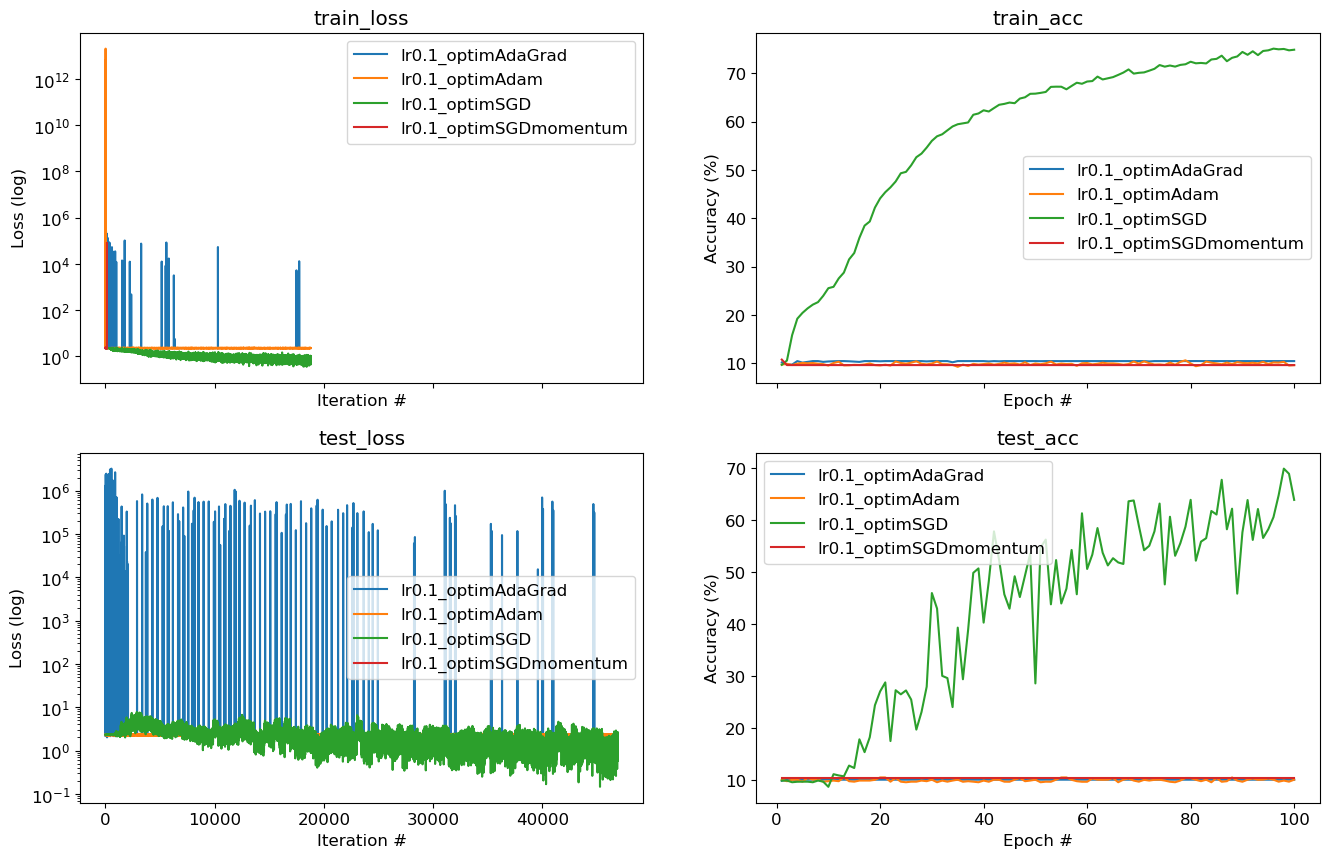

In [7]:
plot_exp_results("exp8_1_lr0.1*.json")

common config:  {'run_name': 'exp8_1_lr0.01_optimSGDmomentum', 'out_dir': './results', 'seed': 1441191647, 'bs_train': 64, 'bs_test': 16, 'batches': 10000, 'epochs': 100, 'early_stopping': 100, 'checkpoints': None, 'lr': 0.01, 'reg': 0, 'optimizer': 'SGDmomentum', 'momentum': 1, 'pool_every': 2, 'hidden_dims': [120, 120, 120, 120], 'ycn': True, 'short_train': True, 'kw': {'tol': 0.001, 'augmentation': False}}


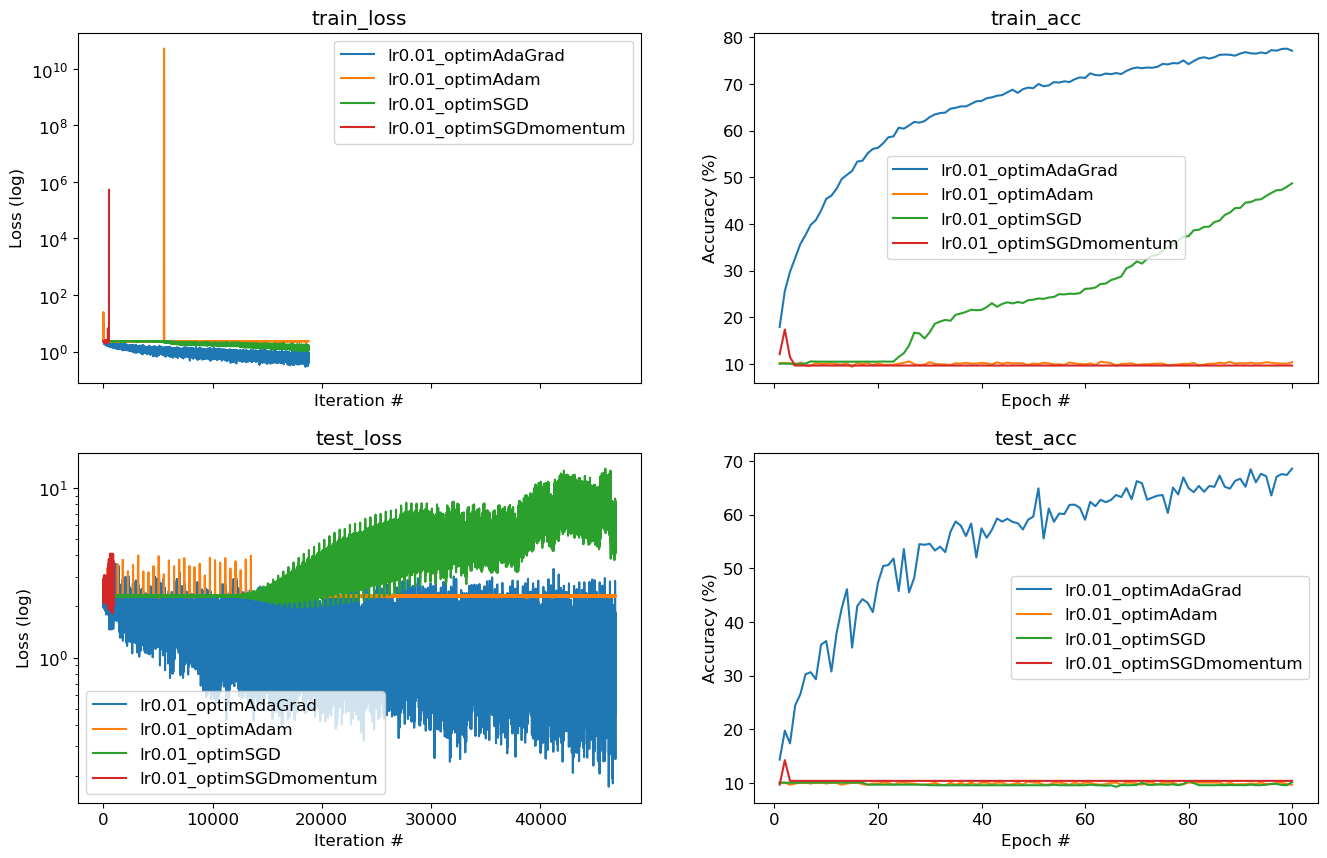

In [8]:
plot_exp_results("exp8_1_lr0.01*.json")

common config:  {'run_name': 'exp8_1_lr0.001_optimSGDmomentum', 'out_dir': './results', 'seed': 586860060, 'bs_train': 64, 'bs_test': 16, 'batches': 10000, 'epochs': 100, 'early_stopping': 100, 'checkpoints': None, 'lr': 0.001, 'reg': 0, 'optimizer': 'SGDmomentum', 'momentum': 1, 'pool_every': 2, 'hidden_dims': [120, 120, 120, 120], 'ycn': True, 'short_train': True, 'kw': {'tol': 0.001, 'augmentation': False}}


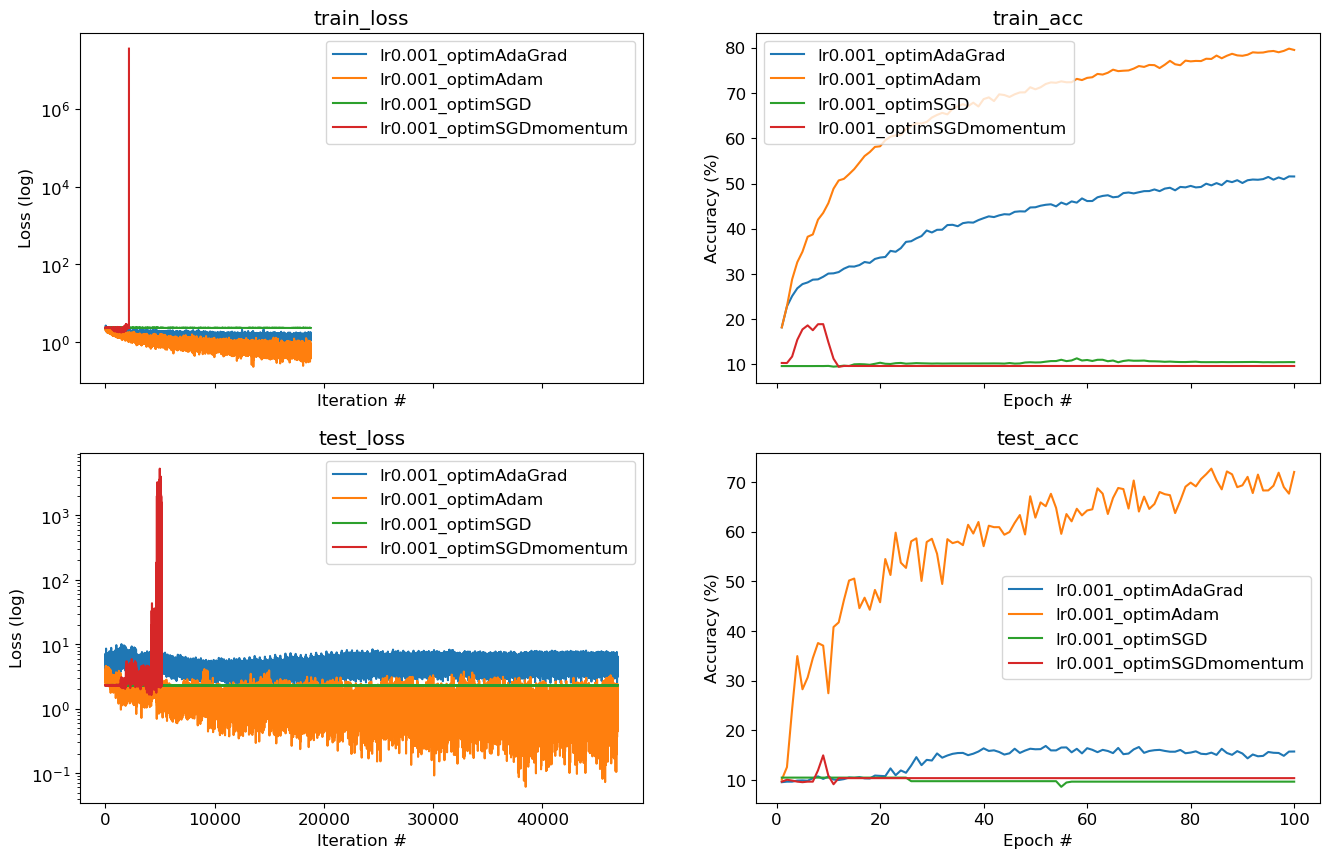

In [9]:
plot_exp_results("exp8_1_lr0.001*.json")

common config:  {'run_name': 'exp8_1_lr0.005_optimSGDmomentum', 'out_dir': './results', 'seed': 265150003, 'bs_train': 64, 'bs_test': 16, 'batches': 10000, 'epochs': 100, 'early_stopping': 100, 'checkpoints': None, 'lr': 0.005, 'reg': 0, 'optimizer': 'SGDmomentum', 'momentum': 1, 'pool_every': 2, 'hidden_dims': [120, 120, 120, 120], 'ycn': True, 'short_train': True, 'kw': {'tol': 0.001, 'augmentation': False}}


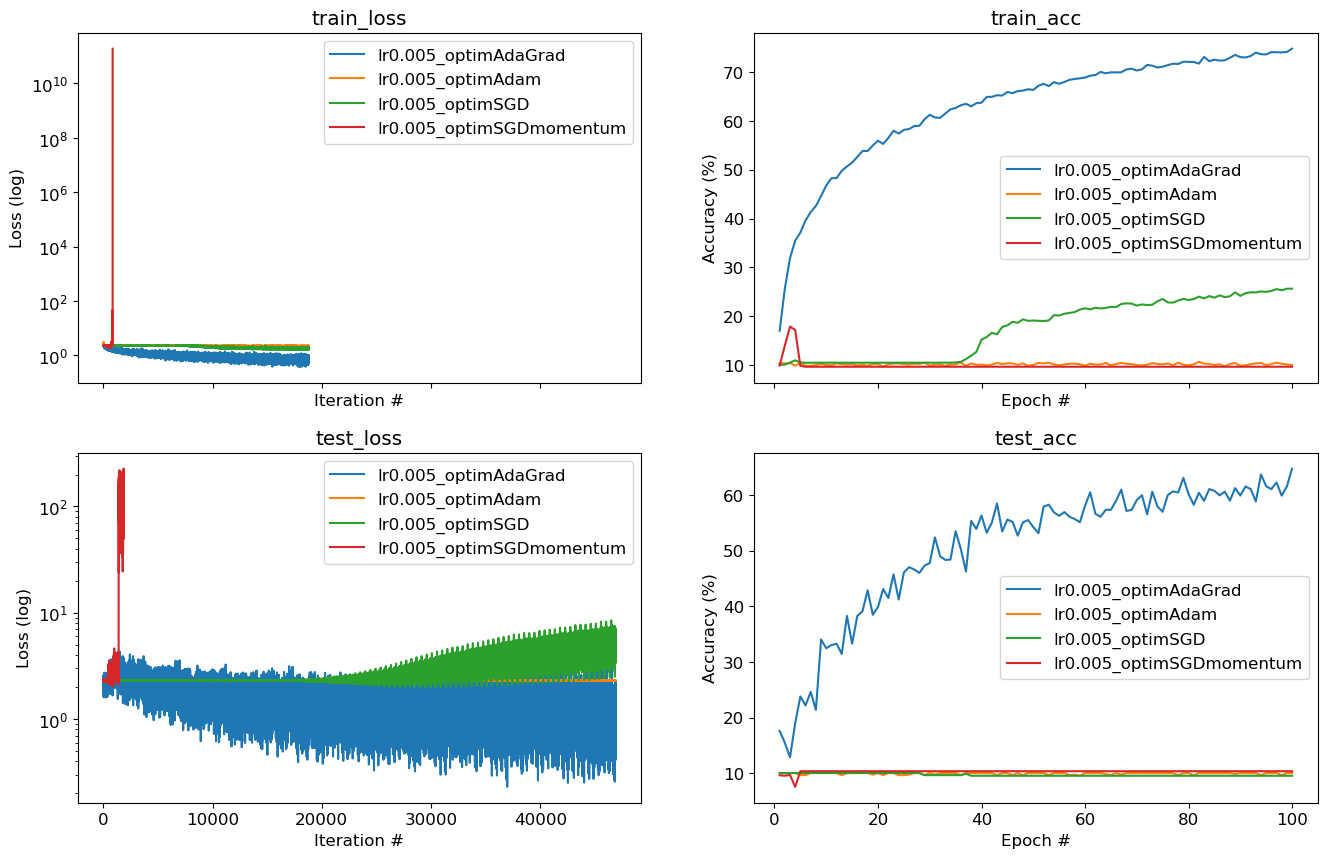

In [10]:
plot_exp_results("exp8_1_lr0.005*.json")

common config:  {'run_name': 'exp8_1_lr0.0005_optimSGDmomentum', 'out_dir': './results', 'seed': 2039451422, 'bs_train': 64, 'bs_test': 16, 'batches': 10000, 'epochs': 100, 'early_stopping': 100, 'checkpoints': None, 'lr': 0.0005, 'reg': 0, 'optimizer': 'SGDmomentum', 'momentum': 1, 'pool_every': 2, 'hidden_dims': [120, 120, 120, 120], 'ycn': True, 'short_train': True, 'kw': {'tol': 0.001, 'augmentation': False}}


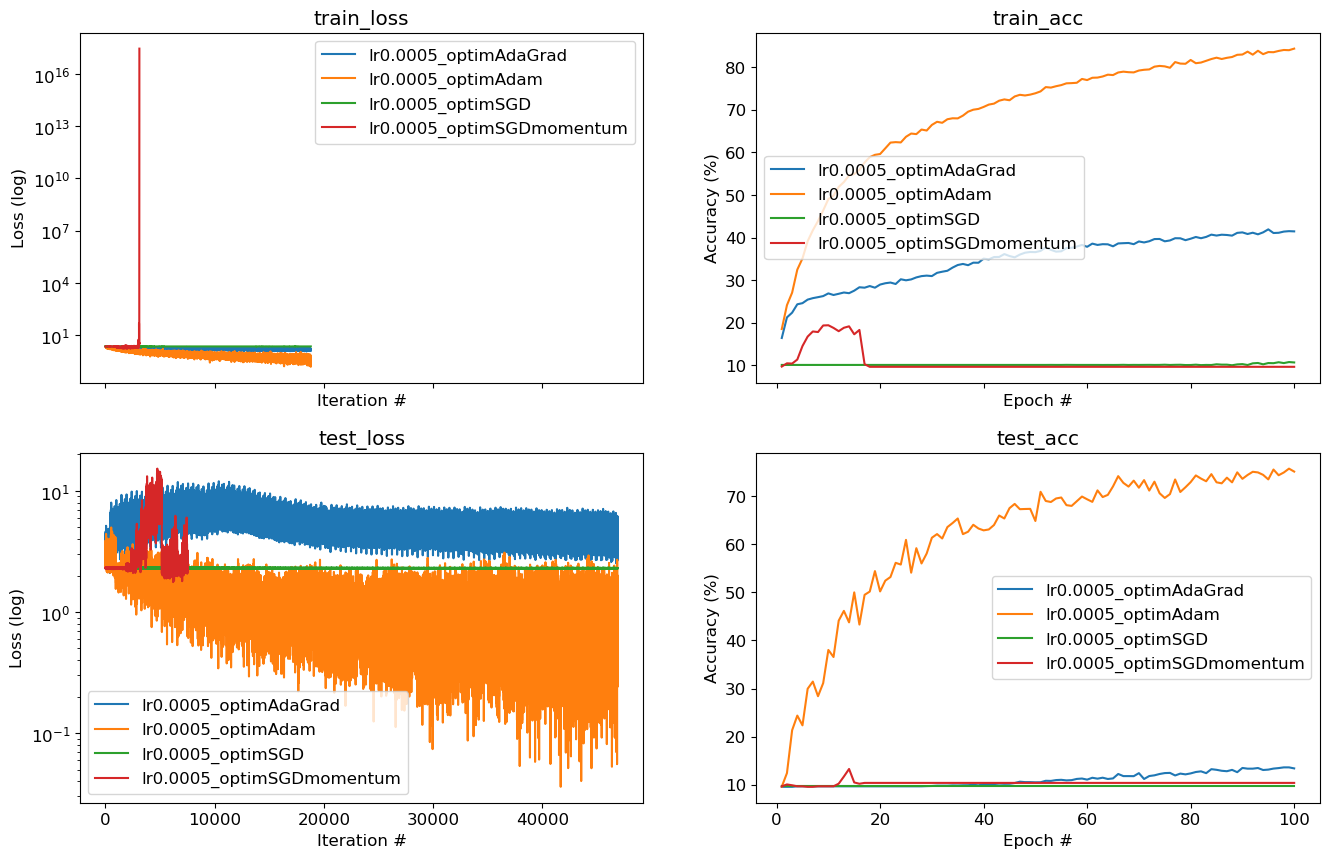

In [11]:
plot_exp_results("exp8_1_lr0.0005*.json")

common config:  {'run_name': 'exp8_1_lr0.01_optimAdam', 'out_dir': './results', 'seed': 1130142868, 'bs_train': 64, 'bs_test': 16, 'batches': 10000, 'epochs': 100, 'early_stopping': 100, 'checkpoints': None, 'lr': 0.01, 'reg': 0, 'optimizer': 'Adam', 'momentum': 0, 'pool_every': 2, 'hidden_dims': [120, 120, 120, 120], 'ycn': True, 'short_train': True, 'kw': {'tol': 0.001, 'augmentation': False}}


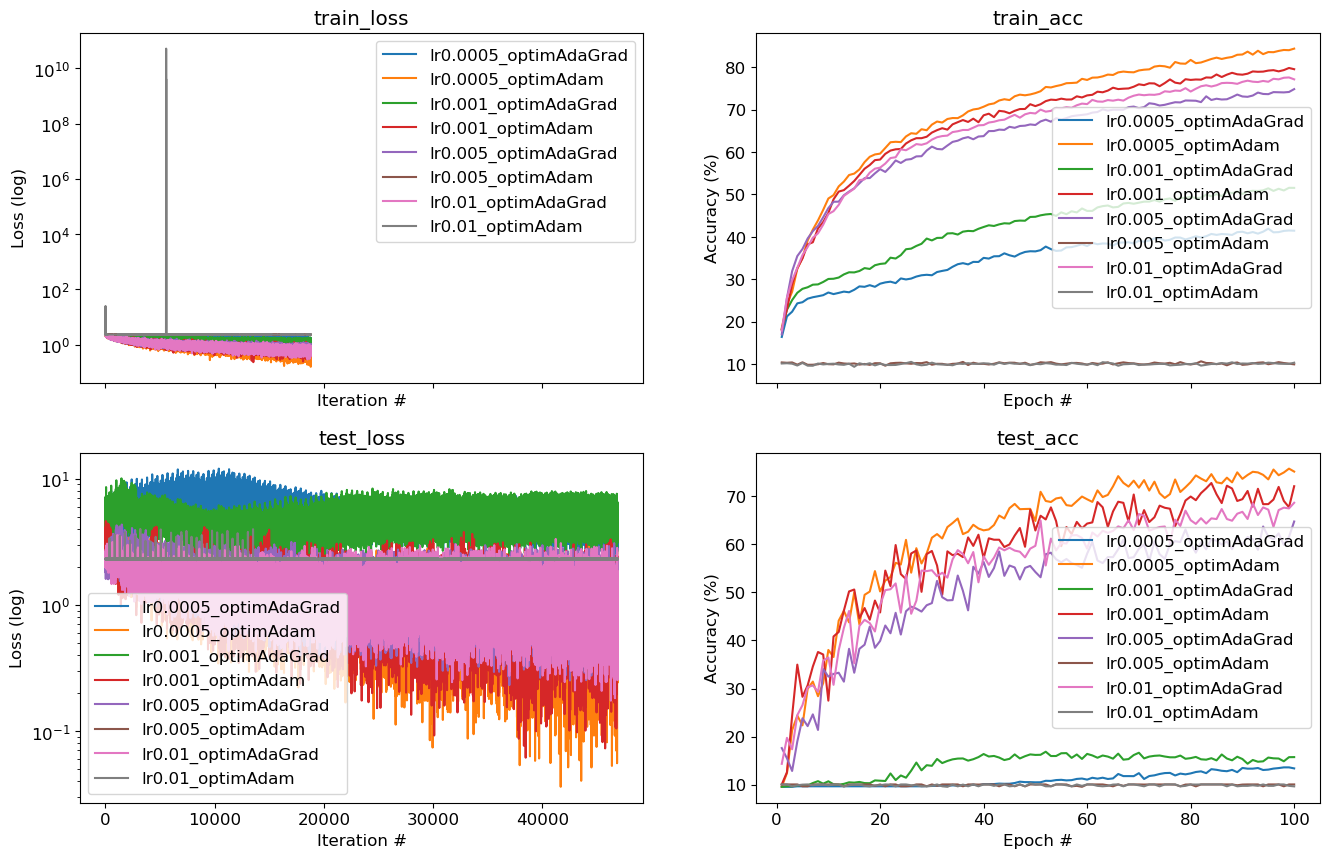

In [12]:
plot_exp_results("exp8_1_lr0.0*_optimAda*.json")

**Answer in your Report:** Why should we add the momentum to SGD? What is the main two improvments adam has comparing to the simple SGD? What was the best optimization algorithm and best learning rate you've found?

Summarize this section results in your report.

**Note** - you will need to change the optimization used in experiments.run_experiment(...).

### 3. Add Batch Normalization
Add batch normalization to your network. You may want to read this blog before:
https://www.baeldung.com/cs/batch-normalization-cnn

In [15]:
#hyper parameters
filter_count=32
layers_per_block = 2
pool_every = layers_per_block
hidden_layer_size = 120
hidden_layer_count = 4
batch_size = 64
epoch_num=100
lr=5e-4
reg=0
filters_per_layer=[filter_count,filter_count*2,filter_count*4,filter_count*8,filter_count*16]
optimizer="Adam"
l1 = False
early_stop=100
#hyper parameters

hidden_dims=[hidden_layer_size]*hidden_layer_count

experiments.run_experiment(f'exp9_1_best_params_so_far',
                    bs_train=batch_size,
                    batches=10000,
                    epochs=epoch_num, 
                    early_stopping=early_stop,
                    reg=reg,
                    lr=lr,
                    filters_per_layer=filters_per_layer,
                    layers_per_block=layers_per_block,
                    pool_every=pool_every,
                    hidden_dims=hidden_dims,
                    tol=1e-3,
                    ycn=True,
                    optimizer=optimizer,
                    momentum=0,
                    augmentation=False,
                    checkpoints="best_no_reg",
                    short_train=False)
# ========================

Files already downloaded and verified
Files already downloaded and verified
YourCodeNet(
  (feature_extractor): Sequential(
    (0): SkipConnectionLayer(
      (connection): Conv2d(3, 32, kernel_size=(1, 1), stride=(1, 1), padding=same)
      (layer): Sequential(
        (0): LeakyReLU(negative_slope=0.01)
        (1): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
        (3): LeakyReLU(negative_slope=0.01)
        (4): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
      )
    )
    (1): Dropout(p=0.5, inplace=False)
    (2): SkipConnectionLayer(
      (connection): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), padding=same)
      (layer): Sequential(
        (0): LeakyReLU(negative_slope=0.01)
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=s

common config:  {'run_name': 'exp9_1_best_params_so_far', 'out_dir': './results', 'seed': 105587704, 'bs_train': 64, 'bs_test': 16, 'batches': 10000, 'epochs': 100, 'early_stopping': 100, 'checkpoints': 'best_no_reg', 'lr': 0.0005, 'reg': 0, 'optimizer': 'Adam', 'momentum': 0, 'pool_every': 2, 'hidden_dims': [120, 120, 120, 120], 'ycn': True, 'short_train': False, 'kw': {'tol': 0.001, 'augmentation': False}}


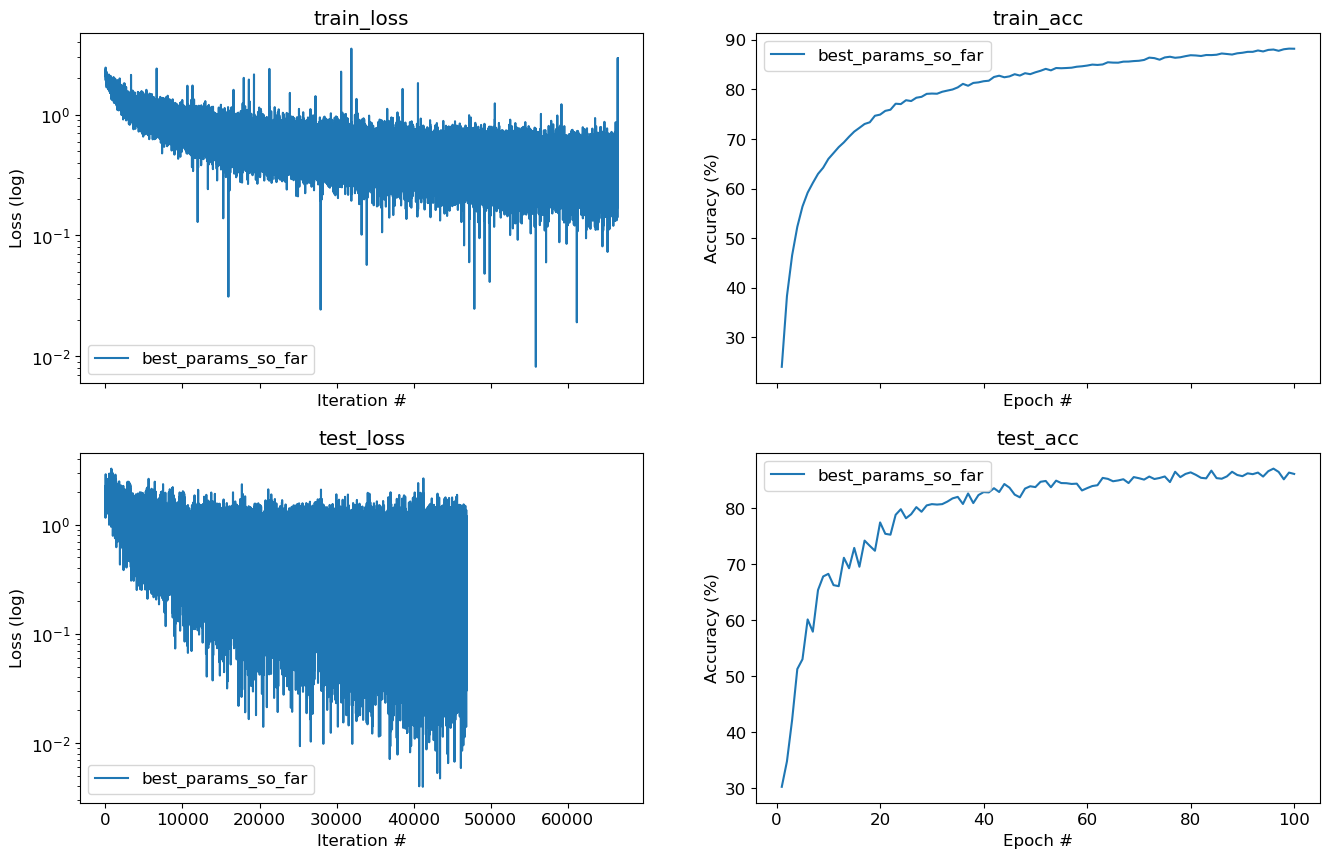

In [13]:
plot_exp_results('exp9_1_best_params_so_far.json')

### 4. Regularization
Try to add regularization to your optimization. In particular add L2, l1 regularization (read about weight_decay in adam) and dropout layer to your network (try them separately).

In [19]:
# run with l1 and diffrent alpha
# ====== YOUR CODE: ======
filter_count=32
layers_per_block = 2
pool_every = layers_per_block
hidden_layer_size = 120
hidden_layer_count = 4
batch_size = 64
epoch_num=100
lr=5e-4
reg=0
filters_per_layer=[filter_count,filter_count*2,filter_count*4,filter_count*8,filter_count*16]
optimizer="Adam"
l1 = False
early_stop=100
#hyper parameters

hidden_dims=[hidden_layer_size]*hidden_layer_count
for alpha in [5e-3,1e-3,5e-4]:
    experiments.run_experiment(f"exp9_1_l1_alpha{alpha}",
                    bs_train=batch_size,
                    batches=10000,
                    epochs=epoch_num, 
                    early_stopping=early_stop,
                    reg=alpha,
                    lr=lr,
                    filters_per_layer=filters_per_layer,
                    layers_per_block=layers_per_block,
                    pool_every=pool_every,
                    hidden_dims=hidden_dims,
                    tol=1e-3,
                    ycn=True,
                    optimizer=optimizer,
                    momentum=0,
                    l1=True,
                    augmentation=False,
                    short_train=True)
# ========================

Files already downloaded and verified
Files already downloaded and verified
YourCodeNet(
  (feature_extractor): Sequential(
    (0): SkipConnectionLayer(
      (connection): Conv2d(3, 32, kernel_size=(1, 1), stride=(1, 1), padding=same)
      (layer): Sequential(
        (0): LeakyReLU(negative_slope=0.01)
        (1): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
        (3): LeakyReLU(negative_slope=0.01)
        (4): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
      )
    )
    (1): Dropout(p=0.5, inplace=False)
    (2): SkipConnectionLayer(
      (connection): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), padding=same)
      (layer): Sequential(
        (0): LeakyReLU(negative_slope=0.01)
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=s

common config:  {'run_name': 'exp9_1_l1_alpha0.1', 'out_dir': './results', 'seed': 1180371039, 'bs_train': 64, 'bs_test': 16, 'batches': 10000, 'epochs': 100, 'early_stopping': 100, 'checkpoints': None, 'lr': 0.0005, 'reg': 0.1, 'optimizer': 'Adam', 'momentum': 0, 'pool_every': 2, 'hidden_dims': [120, 120, 120, 120], 'ycn': True, 'short_train': True, 'kw': {'tol': 0.001, 'l1': True, 'augmentation': False}}


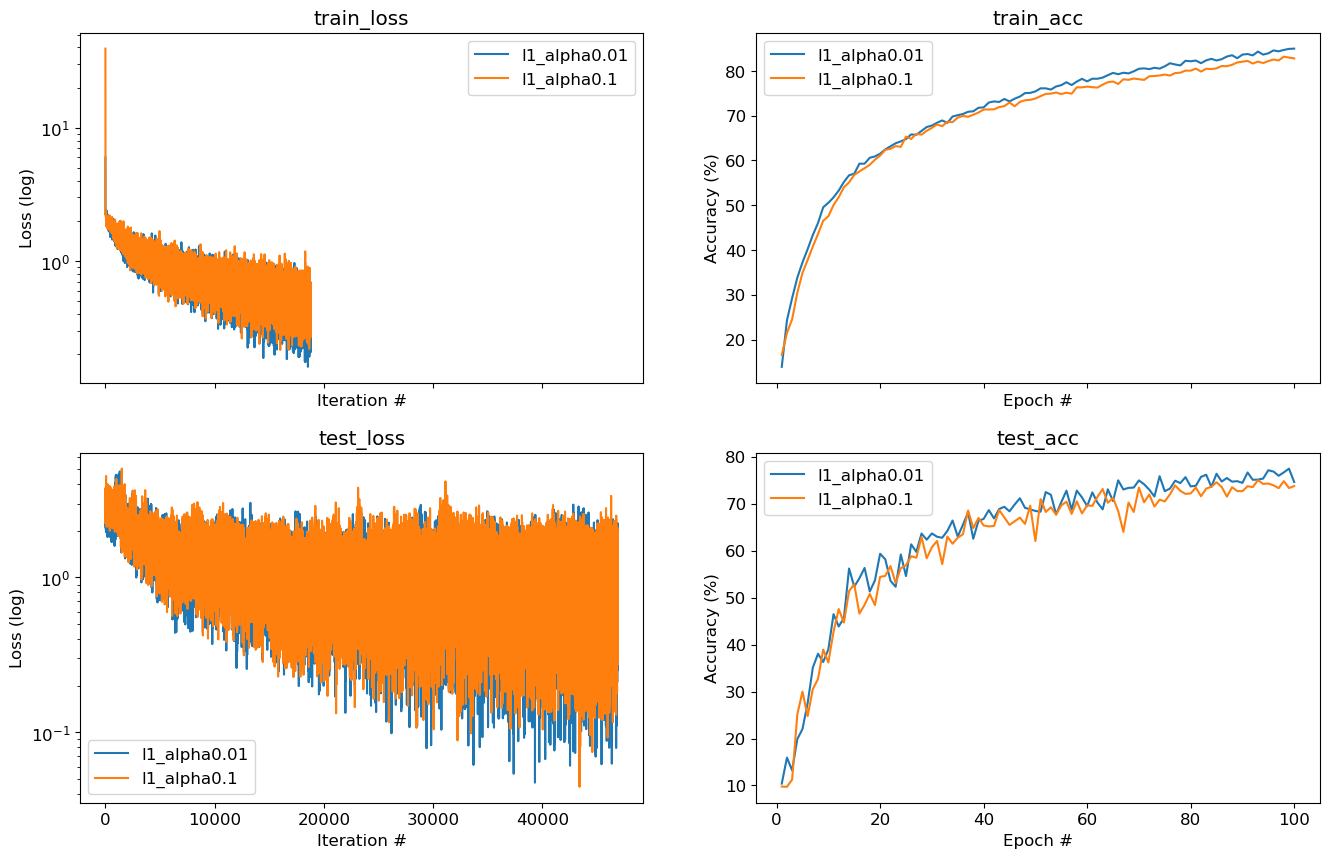

In [14]:
plot_exp_results('exp9_1_l1*.json') # plot your experiments results

In [ ]:
# run with l1 and diffrent alpha
# ====== YOUR CODE: ======
filter_count=64
pool_every = 2
layers_per_block = 2
hidden_layer_size = 120
hidden_layer_count = 4
batch_size = 256
epoch_num=100
lr=5e-3
filters_per_layer=[filter_count,filter_count*2,filter_count*4,filter_count*8]
optimizer="AdaGrad"
#hyper parameters

filters_per_layer=[filter_count]
hidden_dims=[hidden_layer_size]*hidden_layer_count
experiments.run_experiment(f"exp4_2_no_reg",
                    bs_train=batch_size,
                    batches=10000,
                    epochs=epoch_num, 
                    early_stopping=3,
                    reg=0,
                    lr=lr,
                    filters_per_layer=filters_per_layer,
                    layers_per_block=layers_per_block,
                    pool_every=pool_every,
                    hidden_dims=hidden_dims,
                    tol=1e-3,
                    ycn=True,
                    optimizer=optimizer,
                    momentum=0,
                    l1=False,
                    augmentation=False,
                    short_train=True)
# ========================

common config:  {'run_name': 'exp4_2_no_reg', 'out_dir': './results', 'seed': 682492871, 'bs_train': 256, 'bs_test': 64, 'batches': 10000, 'epochs': 100, 'early_stopping': 3, 'checkpoints': None, 'lr': 0.005, 'reg': 0, 'optimizer': 'AdaGrad', 'momentum': 0, 'pool_every': 2, 'hidden_dims': [120, 120, 120, 120], 'ycn': True, 'short_train': True, 'kw': {'tol': 0.001, 'l1': False, 'augmentation': False}}


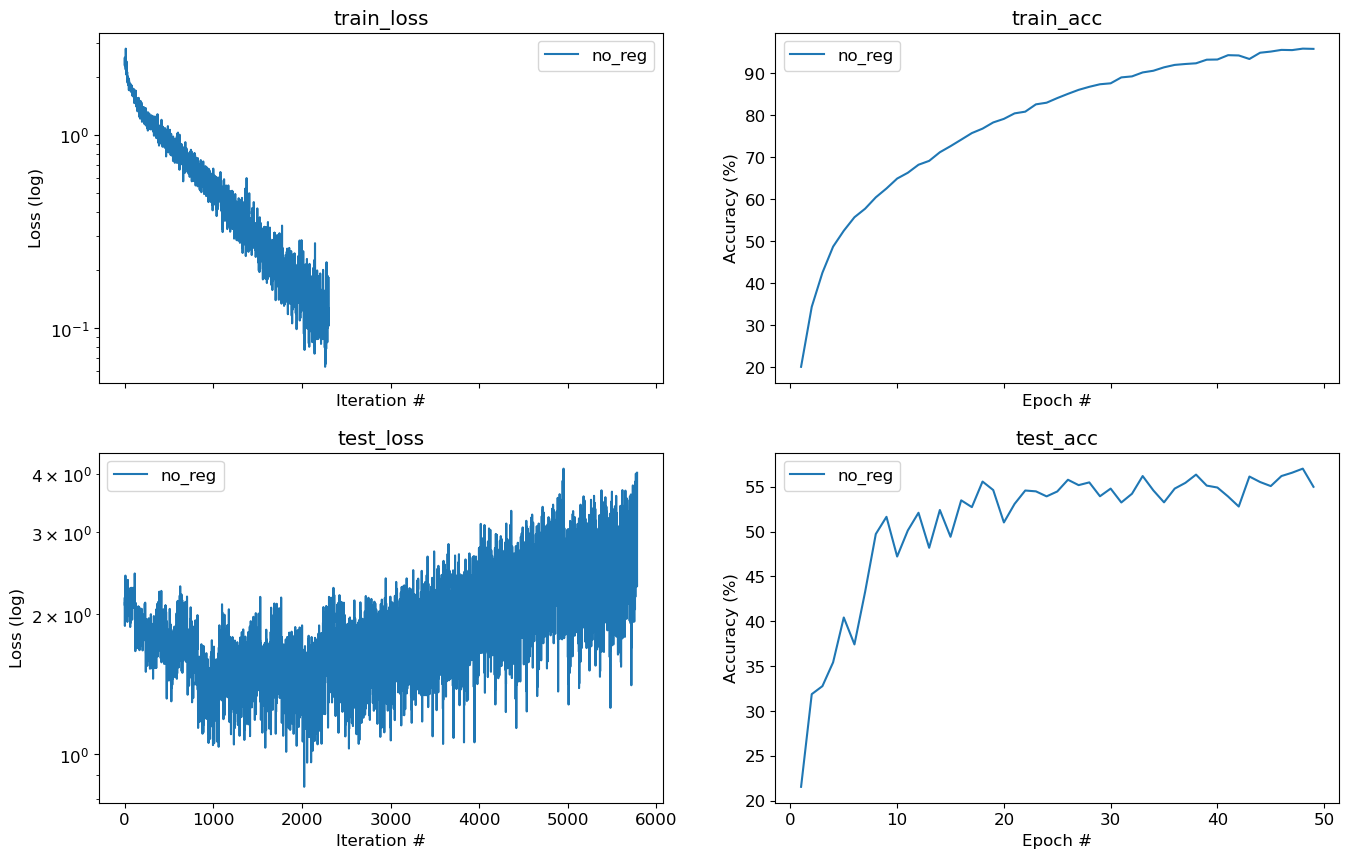

In [15]:
plot_exp_results("exp4_2*.json")

In [ ]:
# run with l2 and diffrent alpha
# ====== YOUR CODE: ======
filter_count=64
pool_every = 2
layers_per_block = 4
hidden_layer_size = 120
hidden_layer_count = 4
batch_size = 256
epoch_num=100
lr=5e-3
filters_per_layer=[filter_count]
optimizer="AdaGrad"
#hyper parameters

filters_per_layer=[filter_count]
hidden_dims=[hidden_layer_size]*hidden_layer_count
for alpha in [0.1,1e-2,5e-3,1e-3,5e-4]:
    experiments.run_experiment(f"exp4_3_l2_alpha{alpha}",
                    bs_train=batch_size,
                    batches=10000,
                    epochs=epoch_num, 
                    early_stopping=3,
                    reg=alpha,
                    lr=lr,
                    filters_per_layer=filters_per_layer,
                    layers_per_block=layers_per_block,
                    pool_every=pool_every,
                    hidden_dims=hidden_dims,
                    tol=1e-3,
                    ycn=True,
                    optimizer=optimizer,
                    momentum=0,
                    l1=False,
                    augmentation=False,
                    short_train=True)
# ========================

common config:  {'run_name': 'exp4_3_l2_alpha0.1', 'out_dir': './results', 'seed': 724624408, 'bs_train': 256, 'bs_test': 64, 'batches': 10000, 'epochs': 100, 'early_stopping': 3, 'checkpoints': None, 'lr': 0.005, 'reg': 0.1, 'optimizer': 'AdaGrad', 'momentum': 0, 'pool_every': 2, 'hidden_dims': [120, 120, 120, 120], 'ycn': True, 'short_train': True, 'kw': {'tol': 0.001, 'l1': False, 'augmentation': False}}


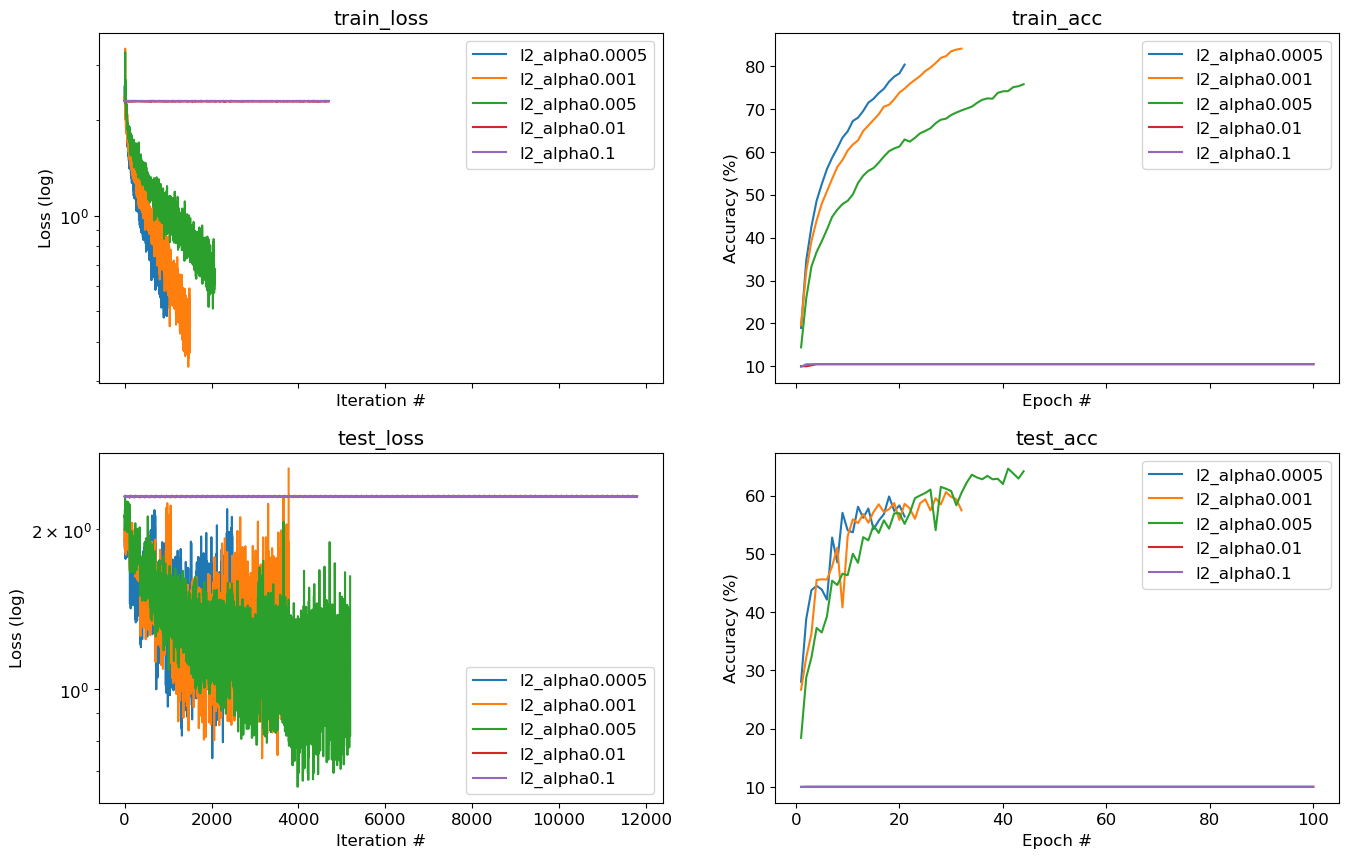

In [16]:
plot_exp_results("exp4_3_l2*.json")

common config:  {'run_name': 'exp4_4_full_test', 'out_dir': './results', 'seed': 2126781139, 'bs_train': 256, 'bs_test': 64, 'batches': 10000, 'epochs': 100, 'early_stopping': 3, 'checkpoints': 'best_no_aug', 'lr': 0.005, 'reg': 0.005, 'optimizer': 'AdaGrad', 'momentum': 0, 'pool_every': 2, 'hidden_dims': [120, 120, 120, 120], 'ycn': True, 'short_train': False, 'kw': {'tol': 0.001, 'augmentation': False, 'l1': False}}


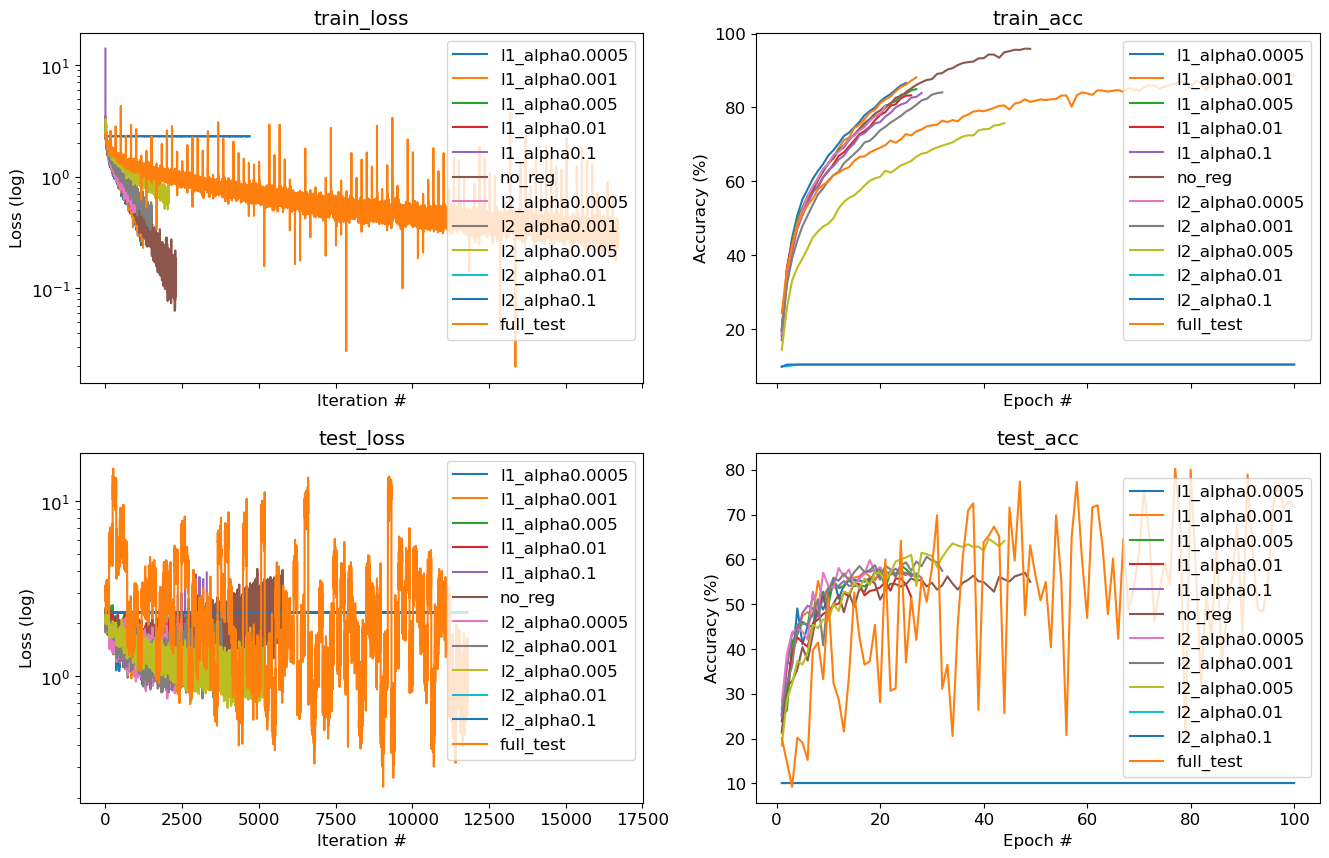

In [17]:
plot_exp_results("exp4_*.json")

**Answer in your Report:** Why should we use regularization?
How does the regularization affect the train accuracy and loss? How does it affect the val and test accuracy and loss? What was the best regulrization method? 
Summarize this section results in your report.

#### try full training with current parameters

In [ ]:
filter_count=32
layers_per_block = 3
pool_every = layers_per_block
hidden_layer_size = 100
hidden_layer_count = 2
batch_size = 128
epoch_num=100
lr=1e-4
reg=1e-4
filters_per_layer=[filter_count,filter_count*2,filter_count*4,filter_count*8,filter_count*16]
optimizer="Adam"
l1 = False
early_stop=5
#hyper parameters

hidden_dims=[hidden_layer_size]*hidden_layer_count
experiments.run_experiment(f"exp7_1_full_test_diff_layers",
                    bs_train=batch_size,
                    batches=10000,
                    epochs=epoch_num, 
                    early_stopping=early_stop,
                    reg=reg,
                    lr=lr,
                    filters_per_layer=filters_per_layer,
                    layers_per_block=layers_per_block,
                    pool_every=pool_every,
                    hidden_dims=hidden_dims,
                    tol=1e-3,
                    ycn=True,
                    optimizer=optimizer,
                    augmentation=False,
                    momentum=0,
                    l1=l1,
                    checkpoints="test_deepening_layers",
                    short_train=False)
# ========================

### 5.Use Data Augmentation
Now try data augmentation. Take a look at pytorch tutorial:
https://pytorch.org/vision/stable/transforms.html


In [ ]:
# set ycn=True when you call experiments.run_experiment(...)
# Use meaningful names!
# ====== YOUR CODE: ======
# run with l1 and diffrent alpha
# ====== YOUR CODE: ======
filter_count=64
pool_every = 2
layers_per_block = 4
hidden_layer_size = 120
hidden_layer_count = 4
batch_size = 256
epoch_num=100
lr=5e-3
reg=5e-3
filters_per_layer=[filter_count]
optimizer="AdaGrad"
#hyper parameters

filters_per_layer=[filter_count]
hidden_dims=[hidden_layer_size]*hidden_layer_count
experiments.run_experiment(f"exp5_1_randomAugmentation",
                    bs_train=batch_size,
                    batches=10000,
                    epochs=epoch_num, 
                    early_stopping=3,
                    reg=reg,
                    lr=lr,
                    filters_per_layer=filters_per_layer,
                    layers_per_block=layers_per_block,
                    pool_every=pool_every,
                    hidden_dims=hidden_dims,
                    tol=1e-3,
                    ycn=True,
                    optimizer=optimizer,
                    momentum=0,
                    l1=False,
                    checkpoints="augmentation",
                    augmentation=True,
                    short_train=False)
# ========================

In [ ]:
plot_exp_results('exp5_1_randomAugmentation.json') # plot your experiments results